Having been checking the output of the pdf_parsing_functions and handled a few edge cases as we went along, the populate_db code has now produced a database with all the data available at the time of downloading.  Now I want to take a first look at the contents of the database, to see what I have to work with.

NB: Before reading this, if you are unfamiliar with curling terminology it may be helpful to read the primer at https://jordanmyslik.com/portfolio/curling-analytics

In [14]:
#Start by setting up the path to the database, and loading in the database helper functions, so we can take some initial quick looks using SQL.
import os
os.environ["CADBPATH"]=os.getcwd() + "/curling_data.db"

import database_functions as db

In [16]:
#First, let's take a look at the available tables
c = """
SELECT name
FROM sqlite_master
WHERE type = 'table' AND
    name NOT LIKE 'sqlite_%'
"""
db.run_query(c)

,name
0,events
1,games
2,ends
3,shots
4,stone_positions


The database contains 5 tables, representing the data from the shot-by-shot summary PDFs hierarchically:
* events: The event in which a game takes place (eg. the 2018 Olympic Winter Games).
* games: Information on the level of a game (e.g. which teams played, the final score, etc.)
* ends: Information on the level of an end (e.g. score for the end, direction of play, which team had last rock advantage).
* shots: Information about each individual shot in the end (e.g. which team threw it, what the skip's call was, how accurately the stone was thrown.)
* stone_positions:  The positions of the stones in the house after each shot is complete.

Although the bulk of the data cleaning was performed by design during the extraction of the data from the shot-by-shot summaries, we should now take a quick look at each table to see if there are any other issues that may need to be dealt with before analyses can be performed with the data they affect.

In [17]:
#Start with the events table.
c = """
SELECT * FROM events
"""
db.run_query(c)

,id,name,start_date,end_date
0,0,CUR_1819_CWC_1P,WED 12 SEP 2018,SUN 16 SEP 2018
1,1,CUR_1819_CWC_2P,WED 5 DEC 2018,SUN 9 DEC 2018
2,2,CUR_1819_CWC_3P,WED 30 JAN 2019,SUN 3 FEB 2019
3,3,CUR_1819_CWC_4P,WED 8 MAY 2019,SUN 12 MAY 2019
4,4,CUR_ECC2016P,SAT 19 NOV 2016,SAT 26 NOV 2016
5,5,CUR_ECCA2017P,SAT 18 NOV 2017,SAT 25 NOV 2017
6,6,CUR_ECCA2018P,SAT 17 NOV 2018,SAT 24 NOV 2018
7,7,CUR_ECCB2017P,FRI 24 NOV 2017,FRI 24 NOV 2017
8,8,CUR_OQE2017P,TUE 5 DEC 2017,SUN 10 DEC 2017
9,9,CUR_PACC2017B,FRI 3 NOV 2017,SAT 4 NOV 2017


The events table is pretty simple, just giving an event name code (based on how the World Curling Federation stored the game results) and the start and end dates of the event in question (which I obtained by getting the minimum and maximum date of the games in each event.)  This relatively small table all looks reasonable, so let's proceed onto the games table.

In [18]:
c = """
SELECT * FROM games
"""
db.run_query(c)

,id,event_id,session,name,sheet,type,start_date,start_time,team_red,team_yellow,final_score_red,final_score_yellow
0,0,0,03~Session_3,Group-B,C,Men,WED 12 SEP 2018,21:00,CAN,SUI,NaN,NaN
1,1,0,03~Session_3,Group-A,B,Men,WED 12 SEP 2018,21:00,NOR,CHN,NaN,NaN
2,2,0,03~Session_3,Group-B,D,Men,WED 12 SEP 2018,21:00,SCO,JPN,NaN,NaN
3,3,0,03~Session_3,Group-A,A,Men,WED 12 SEP 2018,21:00,SWE,USA,NaN,NaN
4,4,0,05~Session_5,Group-B,A,Men,THU 13 SEP 2018,12:00,CAN,SCO,NaN,NaN
5,5,0,05~Session_5,Group-B,B,Men,THU 13 SEP 2018,12:00,SUI,JPN,NaN,NaN
6,6,0,05~Session_5,Group-A,C,Men,THU 13 SEP 2018,12:00,SWE,NOR,NaN,NaN
7,7,0,05~Session_5,Group-A,D,Men,THU 13 SEP 2018,12:00,USA,CHN,NaN,NaN
8,8,0,07~Session_7,Group-A,E,Men,THU 13 SEP 2018,19:30,CHN,SWE,NaN,NaN
9,9,0,07~Session_7,Group-B,D,Men,THU 13 SEP 2018,19:30,JPN,CAN,NaN,NaN


The games table is much larger, holding data for 1269 games played in the 24 events in the events table.  First, let's take a look at each of the columns to see where data may be missing.

In [29]:
c = """ 
SELECT session, COUNT(*) FROM games
GROUP BY session
"""
db.run_query(c)

,session,COUNT(*)
0,01~Session_1,72
1,01~Session_2,1
2,02~Bronze_Medal_Game,1
3,02~Session_1,15
4,02~Session_2,53
5,03~Session_1,3
6,03~Session_2,15
7,03~Session_3,55
8,04~Session_2,14
9,04~Session_3,4


There are a lot of session name codes, and the naming is not terribly consistent (there are additional numeric codes at the beginning).  That said, I don't anticipate these playing a role in the analysis of this data at this point, so I won't make any changes here at this time.  At least based on the alphabetical listing we can be sure that there are no NaN or None entries, so this data was at least extracted faithfully from the folder names.

In [33]:
c = """ 
SELECT name, COUNT(*) FROM games
GROUP BY name
"""
db.run_query(c)

,name,COUNT(*)
0,Bronze Medal Game,9
1,Final,4
2,Finals,4
3,Gold Medal Game,10
4,Group-A,87
5,Group-B,74
6,None,35
7,Page Play-off 1v2,3
8,Page Play-off 3v4,3
9,Page Play-offs,4


The name field provides a little bit more consistency in establishing the session, though we do end up with some inconsistencies in how "Semi Finals" and "Finals" are named, as well as a few instances where the PDF file departed from the standard format (the sessions were broken into "Group-A" and "Group-B").  There are a few entries showing as "None".  Let's see where those come from.

In [40]:
c = """ 
SELECT session, name, COUNT(*) FROM games
WHERE name = 'None'
GROUP BY session
"""
db.run_query(c)

,session,name,COUNT(*)
0,15~Play-Off_1,None,1
1,16~Play-Off_1,None,1
2,17~Finals,None,2
3,17~Play-Off_2,None,1
4,18~Finals,None,2
5,18~Play-Off_2,None,1
6,20~Finals,None,1
7,21~Bronze_Medal_Game,None,1
8,21~Finals,None,3
9,22~Finals,None,1


So, how the summary PDFs for "close to the finals"-type games were organized sometimes left the populate_db code returning "None" for the game's name field sometimes.  If we need this information, "session" and "name" are somewhat redundant, so this can be reconstructed.  Not anticipating using this field at the moment, I will move on to the next column.

In [41]:
c = """ 
SELECT sheet, COUNT(*) FROM games
GROUP BY sheet
"""
db.run_query(c)

,sheet,COUNT(*)
0,A,267
1,B,298
2,C,308
3,D,273
4,E,88
5,None,35


Once again, most of the games have a reasonably sheet number available, which could maybe be used to look at whether specific sheets had problems during a specific event.  As for the entries with sheet = None:

In [43]:
c = """ 
SELECT session, sheet, COUNT(*) FROM games
WHERE sheet = 'None'
GROUP BY session
"""
db.run_query(c)

,session,sheet,COUNT(*)
0,15~Play-Off_1,None,1
1,16~Play-Off_1,None,1
2,17~Finals,None,2
3,17~Play-Off_2,None,1
4,18~Finals,None,2
5,18~Play-Off_2,None,1
6,20~Finals,None,1
7,21~Bronze_Medal_Game,None,1
8,21~Finals,None,3
9,22~Finals,None,1


This is the same issue that affected the game name field.  Here, though, the information can't be recovered from another field.  That said, it's just a small number of games affected (35 out of 1269), so really any analysis using sheet number could probably drop them safely, unless their focus was on the "close to the finals" games (which these may represent a significant fraction of.)

In [44]:
c = """ 
SELECT type, COUNT(*) FROM games
GROUP BY type
"""
db.run_query(c)

,type,COUNT(*)
0,Men,665
1,Women,604


A game's "type" indicates whether it was a Men's game or a Women's game.  The World Curling Federation also takes data for a game format called "Mixed Doubles", though for these analyses I restricted myself to the traditional game format.  We can tell here that all games were tagged as Men or Women games, and that there are pretty close to an equal number of each.  However, the difference is 10%, so we should not assume an equal number of Men's and Women's games. 

In [46]:
c = """ 
SELECT start_date, COUNT(*) FROM games
GROUP BY start_date
"""
db.run_query(c)

,start_date,COUNT(*)
0,FRI 3 FEB 2017,3
1,FRI 7 APR 2017,1
2,FRI 8 APR 2016,1
3,FRI 1 FEB 2019,12
4,FRI 10 MAY 2019,12
5,FRI 14 SEP 2018,12
6,FRI 16 FEB 2018,10
7,FRI 17 FEB 2017,12
8,FRI 22 FEB 2019,2
9,FRI 23 FEB 2018,3


That's a lot of dates, as we'd expect.  To make sure they're all valid, since we know that none of the games we're considering were played before 2010, we'll add the condition onto that query that the field must contain " 201" (i.e. contains the year.)  If we get to the point where we're considering game dates, we can check the formatting more closely then.

In [59]:
c = """ 
SELECT start_date, COUNT(*) FROM games
WHERE start_date LIKE '% 201%'
GROUP BY start_date
"""
db.run_query(c)

,start_date,COUNT(*)
0,FRI 3 FEB 2017,3
1,FRI 7 APR 2017,1
2,FRI 8 APR 2016,1
3,FRI 1 FEB 2019,12
4,FRI 10 MAY 2019,12
5,FRI 14 SEP 2018,12
6,FRI 16 FEB 2018,10
7,FRI 17 FEB 2017,12
8,FRI 22 FEB 2019,2
9,FRI 23 FEB 2018,3


There are 160 rows in this check, and 160 rows in the original query, so the date column appears reasonable, at least for now.  Let's move on to the time column.

In [60]:
c = """ 
SELECT start_time, COUNT(*) FROM games
GROUP BY start_time
"""
db.run_query(c)

,start_time,COUNT(*)
0,10:00,8
1,12:00,77
2,12:30,1
3,13:00,9
4,13:30,34
5,14:00,245
6,14:05,29
7,15:00,28
8,15:35,2
9,16:00,68


All of those start times look reasonable.  Let's move on to the team codes.

In [61]:
c = """ 
SELECT team_red, COUNT(*) FROM games
GROUP BY team_red
"""
db.run_query(c)

,team_red,COUNT(*)
0,AUS,9
1,AUT,10
2,CAN,94
3,CAN1,3
4,CAN2,3
5,CHN,74
6,CZE,34
7,DEN,58
8,FIN,31
9,GBR,11


In [62]:
c = """ 
SELECT team_yellow, COUNT(*) FROM games
GROUP BY team_yellow
"""
db.run_query(c)

,team_yellow,COUNT(*)
0,AUS,9
1,AUT,9
2,CAN,89
3,CAN1,3
4,CAN2,4
5,CHN,76
6,CZE,33
7,DEN,54
8,FIN,35
9,GBR,16


team_red and team_yellow all contain country codes, as expected.  Normally 3 letters, though it appears (rows 3 and 4) that Canada entered two teams (CAN1 and CAN2) into an event.  Finally, let's look at the final scores:

In [27]:
c = """ 
SELECT final_score_red, COUNT(*) FROM games
GROUP BY final_score_red
"""
db.run_query(c)

,final_score_red,COUNT(*)
0,NaN,169
1,0.0,4
2,1.0,19
3,2.0,57
4,3.0,107
5,4.0,107
6,5.0,129
7,6.0,160
8,7.0,154
9,8.0,162


In [63]:
c = """ 
SELECT final_score_yellow, COUNT(*) FROM games
GROUP BY final_score_yellow
"""
db.run_query(c)

,final_score_yellow,COUNT(*)
0,NaN,169
1,0.0,3
2,1.0,19
3,2.0,52
4,3.0,85
5,4.0,113
6,5.0,141
7,6.0,156
8,7.0,171
9,8.0,152


Here we see that each of these columns has 169 games with "NaN" listed as their final score.  Let's check if it's the same 169 games for both columns.

In [77]:
c = """ 
SELECT final_score_red, final_score_yellow, COUNT(*) FROM games
WHERE final_score_yellow IS NULL
GROUP BY final_score_red
"""
db.run_query(c)

,final_score_red,final_score_yellow,COUNT(*)
0,None,None,169


It is indeed just those 169 games missing final score information.  Looking at the original PDF documents, in those instances the "score and time remaining" box is completely missing from the format used.  This information could be recovered easily enough with the information in the stone_positions table, but since this represents only about 10% of the data, we might be able to get away without this data.  If this comes up in an analysis, we can decide how to handle it.

There is one more outlier worth mentioning:  A final score of 999.  This specific instance represents an edge case, where a game was score W-L.  In this case, 999 corresponds to "Win", and 0 was entered for the loss.

Now that we've explored where issues with the data may arise in the games table, let's move on to the ends table.

In [78]:
c = """
SELECT * FROM ends
"""
db.run_query(c)

,id,game_id,number,direction,color_hammer,score_red,score_yellow,time_left_red,time_left_yellow
0,0,0,1,1,red,NaN,NaN,NaN,NaN
1,1,0,2,0,yellow,NaN,NaN,NaN,NaN
2,2,0,3,1,yellow,NaN,NaN,NaN,NaN
3,3,0,4,0,red,NaN,NaN,NaN,NaN
4,4,0,5,1,yellow,NaN,NaN,NaN,NaN
5,5,0,6,0,red,NaN,NaN,NaN,NaN
6,6,0,7,1,yellow,NaN,NaN,NaN,NaN
7,7,0,8,0,yellow,NaN,NaN,NaN,NaN
8,8,1,1,1,red,NaN,NaN,NaN,NaN
9,9,1,2,0,red,NaN,NaN,NaN,NaN


Immediately a lot of NaN stands out in the columns giving the score and the time left (in seconds).  This is again a known issue with the missing "score and time left" box.  In some instances this was only missing in all ends before the last end, but some of them miss it in all ends.

As with the games table, let's go through each of the columns in the ends table and look for non-sensical values, and see what fraction of the ends have problematic data, keeping in mind that we have 11472 ends in this table.

In [79]:
c = """ 
SELECT number, COUNT(*) FROM ends
GROUP BY number
"""
db.run_query(c)

,number,COUNT(*)
0,1,1269
1,2,1269
2,3,1269
3,4,1269
4,5,1269
5,6,1268
6,7,1169
7,8,1067
8,9,837
9,10,673


The end number is just extracted from the page number in the shot-by-shot summary PDF, as it's one page per end.  8 ends is a typical game length, though 10 is also commonly seen in some competitions.  An extra end may be added to break a tie, and if the difference in score is high the later ends may not be played.  So all of these end number counts look reasonable to me.

In [80]:
c = """ 
SELECT direction, COUNT(*) FROM ends
GROUP BY direction
"""
db.run_query(c)

,direction,COUNT(*)
0,0,5580
1,1,5892


A standard curling sheet of ice has the house at both ends of the sheet, and the game alternates between using the house on each end of the ice.  For the stone_positions table, the desire was to standardize on one direction, where in the shot by shot summary image the house is at the bottom ("down", denoted by direction 0).  So in the other ends where the house was at the top of the image ("up", denoted by direction 0), the coordinate system was changed.  We store the direction so that this information (sometimes the ice plays differently in different directions down the sheet) is available.

Why choose "down" as the standard coordinate system?  This is the view that the skip has when the call the shots.  We assigned the origin to the center of the button, making it easy to determine which rocks are closer to the button, with negative y values being behind the t-line.

Getting back to this direction validation, it's reasonable that the two directions have similar frequency, but also reasonable that they differ:  Games are probably biased towards starting in the "up" direction, and if they end 1 end early, there will be more "up" ends than "down" ends.

So, let's move on to color_hammer.

In [81]:
c = """ 
SELECT color_hammer, COUNT(*) FROM ends
GROUP BY color_hammer
"""
db.run_query(c)

,color_hammer,COUNT(*)
0,error_color,11
1,red,5724
2,yellow,5737


"Having the hammer" for an end means that the team is throwing the last stone of the end (also called "last rock advantage").  This switches between scoring teams in each end, so it makes sense that it's roughly equal.  These 11 instances of error_color are rather concerning though.  Clearly the code that determines which team is shooting first was unable to do so for 11 ends (out of 11472, so we can probably just ignore these ends.)  I'm curious where it failed though, so let's dig a little deeper by getting enough information to find the PDF document.

In [84]:
c = """
SELECT events.name, games.session, games.team_red, games.team_yellow, games.type, ends.number FROM games
INNER JOIN events ON events.id = games.event_id
INNER JOIN ends ON ends.game_id = games.id
WHERE ends.color_hammer = 'error_color'
"""
db.run_query(c)

,name,session,team_red,team_yellow,type,number
0,CUR_ECCA2017P,10~Session_5,ITA,HUN,Women,7
1,CUR_WJCC2017P,10~Session_10,TUR,CAN,Men,3
2,CUR_WJCC2017P,10~Session_10,TUR,CAN,Men,4
3,CUR_WJCC2017P,10~Session_10,TUR,CAN,Men,5
4,CUR_WJCC2017P,10~Session_10,TUR,CAN,Men,6
5,CUR_WJCC2017P,10~Session_10,TUR,CAN,Men,7
6,CUR_WMCC2017P,13~Session_13,ITA,SUI,Men,9
7,CUR_WWCC2017P,09~Session_9,RUS,GER,Women,8
8,CUR_WWCC2017P,09~Session_9,RUS,GER,Women,9
9,CUR_WWCC2018P,02~Session_2,SUI,CAN,Women,2


Interestingly enough, it is a smattering of ends from different events.  Taking a look at the shot by shot summaries, there seem to be a number of different reasons that the code failed to make the extraction.  The code works by finding the team with 8 unthrown stones, and it bases this determination based solely on the stone size.  With that in mind:
* CUR_ECCA2017P entry has a large yellow stone covering most of the red unthrown stones, messing up the count.
* CUR_WJCC2017P entries have a stone-colored box showing up on the ice in those ends, small enough to count as an unthrown stone.
* CUR_WMCC2017P entry does not appear to have any issues, so would require further debugging.
* CUR_WWCC2017P entries also have the stone-colored box on the ice.
* CUR_WWCC2018P entry has a large yellow rock covering most unthrown yellow rocks, messing up the count.
* CU_WMCC2016P entry also has a large yellow rock covering most unthrown yellow rocks.

So, with the exception of the CUR_WMCC2017P entry, all of these involve weird artifact edge cases, that the parsing algorithm might have difficulty with even with tweaking.  As they are such a small percentage of ends, we just need to be sure to filter these out if it's relevant to the analysis at hand.

So, let's move on to score_red, score_yellow, time_left_red, and time_left_yellow.

In [85]:
c = """ 
SELECT score_red, COUNT(*) FROM ends
GROUP BY score_red
"""
db.run_query(c)

,score_red,COUNT(*)
0,NaN,2865
1,0.0,1113
2,1.0,1120
3,2.0,1298
4,3.0,1272
5,4.0,1069
6,5.0,874
7,6.0,706
8,7.0,518
9,8.0,333


In [86]:
c = """ 
SELECT score_yellow, COUNT(*) FROM ends
GROUP BY score_yellow
"""
db.run_query(c)

,score_yellow,COUNT(*)
0,NaN,2865
1,0.0,949
2,1.0,1165
3,2.0,1361
4,3.0,1249
5,4.0,1031
6,5.0,981
7,6.0,704
8,7.0,547
9,8.0,309


For the scores, we see the scope of the problem we mentioned before.  Almost 30% of ends don't have a score associated with them, because the box expected to include it does not appear in those ends.  If we're interested in end-by-end score, we probably want to reconstruct it from the stone positions at the end of the end.  (We could then do some validation by comparing what that method gives to what is tabulated for the score when the box does appear, as an accuracy check.)

In [87]:
c = """ 
SELECT time_left_red, COUNT(*) FROM ends
GROUP BY time_left_red
"""
db.run_query(c)

,time_left_red,COUNT(*)
0,NaN,2865
1,0.0,5343
2,3.0,2
3,4.0,2
4,5.0,1
5,6.0,2
6,7.0,1
7,8.0,2
8,9.0,1
9,10.0,1


In [88]:
c = """ 
SELECT time_left_yellow, COUNT(*) FROM ends
GROUP BY time_left_yellow
"""
db.run_query(c)

,time_left_yellow,COUNT(*)
0,NaN,2865
1,0.0,5343
2,1.0,1
3,3.0,1
4,4.0,2
5,5.0,5
6,6.0,2
7,8.0,4
8,10.0,3
9,11.0,4


The time_left variables are even more problematic.  80% of the time the reporting box either isn't there or just has zero in it.  This data unfortunately is not recoverable by other means.  Any analysis looking at time usage during a game will have to work with only 20% of ends.


With that, let's go one level deeper, and take a cursory look at the shot data.

In [89]:
c = """ 
SELECT * from shots
"""
db.run_query(c)

,id,end_id,number,color,team,player_name,type,turn,percent_score
0,0,0,1,yellow,SUI,TANNER V,Front,counterclockwise,100
1,1,0,2,red,CAN,HEBERT B,Draw,counterclockwise,75
2,2,0,3,yellow,SUI,TANNER V,Hit and Roll,counterclockwise,50
3,3,0,4,red,CAN,HEBERT B,Draw,counterclockwise,100
4,4,0,5,yellow,SUI,DE CRUZ P,Draw,counterclockwise,75
5,5,0,6,red,CAN,FLASCH C,Draw,counterclockwise,25
6,6,0,7,yellow,SUI,DE CRUZ P,Take-out,clockwise,50
7,7,0,8,red,CAN,FLASCH C,Draw,counterclockwise,None
8,8,0,9,yellow,SUI,MICHEL S,Take-out,counterclockwise,100
9,9,0,10,red,CAN,NEUFELD BJ,Hit and Roll,counterclockwise,100


In [91]:
c = """ 
SELECT number, COUNT(*) from shots
GROUP BY number
"""
db.run_query(c)

,number,COUNT(*)
0,1,11472
1,2,11472
2,3,11459
3,4,11458
4,5,11458
5,6,11457
6,7,11456
7,8,11455
8,9,11454
9,10,11454


Each team throws 8 rocks, so there should be 16 shot numbers in each end.  Recall that there were 11472 ends.  So we do see that there were at least that many 1st and 2nd shots.  The number of each shot number declines from there.  Often  in the last end of a game the losing team may acknowledge their defeat and end the game early after there are no longer sufficient rocks to be played to allow them to win.  So, fewer that 1 of each shot number per end is definitely possible that way.

So, to first order these numbers definitely look reasonable.  I'm a little surprised that there are instances where ends ended after the 2nd shot was thrown.  Let's put together a query that gives us the information we need to find the shot-by-shot summary PDF for such a game, to get a good example of what happened.

In [98]:
c = """
WITH shot_counts AS(
    SELECT end_id, COUNT(end_id) AS shot_counts FROM shots
    GROUP BY end_id
    HAVING shot_counts < 10
)
SELECT events.name, games.type, games.session, games.team_red, games.team_yellow, ends.number, shot_counts.shot_counts FROM games
INNER JOIN events ON events.id = games.event_id
INNER JOIN ends ON ends.game_id = games.id
INNER JOIN shot_counts ON shot_counts.end_id = ends.id
"""
db.run_query(c)

,name,type,session,team_red,team_yellow,number,shot_counts
0,CUR_1819_CWC_1P,Men,09~Session_9,USA,SWE,9,2
1,CUR_1819_CWC_3P,Men,04~Session_4,NOR,SCO,9,2
2,CUR_1819_CWC_3P,Men,06~Session_6,SWE,SUI,9,2
3,CUR_1819_CWC_3P,Men,08~Session_8,SCO,CAN,9,2
4,CUR_1819_CWC_3P,Men,10~Session_10,USA,SWE,9,2
5,CUR_1819_CWC_3P,Women,09~Session_9,RUS,CHN,9,2
6,CUR_1819_CWC_3P,Women,10~Session_10,USA,SCO,9,2
7,CUR_1819_CWC_3P,Women,12~Session_12,SCO,JPN,9,2
8,CUR_1819_CWC_3P,Women,14~Session_14,JPN,USA,9,2
9,CUR_1819_CWC_4P,Men,03~Session_3,USA,CAN1,9,2


Above are all of the instances where the number of shots in an end was less than 10.  Note that it is all end numbers near the end of the game.  Let's pull a few entries to check a few examples.

In entry 0 (USA-SWE), it looks like this was supposed to be an 8 end game, but the game was tied after 8 ends, so the 9th end appears to have just been a "draw to the button" to settle the tie.  (Each team is given the opportunity to get a rock as close as possible to the button, with no other rocks in play, and whoever is closest wins the game.)  I'm guessing the large number of 2 shot counts in the CWC ("Curling World Cup") games in this table are similarly tie-breaker instances.  Let's look at a few larger numbers.

Entry 14, CUR_ECCA2016P, FIN-RUS in Session 5 has 3 shots in the end.  Om this case, Russia was up by 4 points going into the 10th end.  Russia shot their first rock through (so as not to give Finland any cover.)  Finland called a Front guard, but it went into the house, and the Russians removed it from play on their 2nd shot (shot 3).  At this point Finland conceded.

Entry 15 has an even higher shot number.  Germany was up by 5 points going into the last end, and Italy conceded after the 5th shot.

I'm sufficiently satisfied now that the numbers in this column appear reasonable.  Let's move on to color.

In [99]:
c = """ 
SELECT color, COUNT(*) from shots
GROUP BY color
"""
db.run_query(c)

,color,COUNT(*)
0,red,91386
1,yellow,91389


Here we see no instances of "error_color", and a roughly equal red/yellow distribution (which we'd expect it to be, modulo a few concessions.)  This is because although the first rock thrown's color is used to establish the team to color correspondence, this is only done in the first end of the game, and none of the edge cases were in the first end.  (So we could go back and reconstruct hammer_color in the missing cases using the name of the team making the first shot in the end, and the color of the team making that shot, as recorded in the shots table.)

Since this appears to make sense, let's move on to the team column:

In [100]:
c = """ 
SELECT team, COUNT(*) from shots
GROUP BY team
"""
db.run_query(c)

,team,COUNT(*)
0,AUS,1292
1,AUT,1303
2,CAN,12744
3,CAN1,384
4,CAN2,415
5,CHN,10529
6,CZE,5081
7,DEN,8333
8,FIN,4770
9,GBR,2099


Once again, this appears to be a reasonable list of team name codes.  Let's move on to player_name.

In [101]:
c = """ 
SELECT player_name, COUNT(*) from shots
GROUP BY player_name
"""
db.run_query(c)

,player_name,COUNT(*)
0,ABBES E,697
1,ABE S,166
2,ADAMS V,958
3,AITA K,8
4,AITKEN G,57
5,AKHMAD R,20
6,AL-ABDULLA M,90
7,AL-FAHAD A,126
8,AL-QAET A,90
9,AL-QAET S,90


The name data can be tricky to deal with, as I have seen spelling mistakes crop up in the player names within shot-by-shot summaries.

Entries 642-644 above are a good case study:
* Name Number_of_shots
* WRANA R	190
* WRANAA I	316
* WRANAA R	1319

Are these 3 different people, 2 people with 1 spelling mistake, or one person with 2 spelling mistakes?  Foreign names can be improperly transliterated to give initials, but even if a last name is uncommon, it's also reasonably common to see brothers or sisters playing on the same team (or an older sibling playing in earlier competitions, followed by a younger sibling.)  I won't spend any time trying to disentangle this now, but any analysis concerned with the statistics of individual players probably needs to consider this more carefully.


Next up is the "type" field.

In [102]:
c = """ 
SELECT type, COUNT(*) from shots
GROUP BY type
"""
db.run_query(c)

,type,COUNT(*)
0,Clearing,16609
1,Double Take-out,10354
2,Draw,57199
3,Freeze,1434
4,Front,18719
5,Guard,10980
6,Hit and Roll,14656
7,None,4806
8,Promotion Take-out,5049
9,Raise,5531


These are the "type" of shot that the skip called, as noted by the statistics-taker.  Most of these seem reasonable, but note a few things:
* "None" and "no statistics": In many cases full statistics weren't taken for games. Most of these show up as "None", while some show up as "no statistics".
* For 42 shots the statistics-taker used a lower case "t" on "Through" instead of the upper-case "t".
* "Front" and "Guard" nominally mean the same thing, and are both very common shot types.  An analysis looking at shot types should dig into whether there is a real difference between the two, or whether there was just a change in standard nomenclature at some point (or if they are used interchangeably.)

Now, let's look at turn.

In [103]:
c = """ 
SELECT turn, COUNT(*) from shots
GROUP BY turn
"""
db.run_query(c)

,turn,COUNT(*)
0,Free guard zone violation,2
1,Hogline violation,1
2,In,4615
3,Measurement,8
4,None,4806
5,Out,5690
6,Run out of time,1
7,clockwise,79453
8,counterclockwise,88198
9,picked up debris,1


The turn column shows a few shortcomings in the algorithm to pull this information from the shot-by-shot summary PDFs.  It appears that various non-standard situations sometimes get picked up as the shot turn.  However, these situations are extremely few (13 out of over 180,000 shots), so not big enough of an issue to deal with at this point.

However, there are also two different ways of specifying the turn on the stone, that we see here:
* clockwise or counterclockwise:  By far the most common in this dataset, and the least ambiguous, it specifies the turn by the rotation direction of the rock.
* In or Out: Couples the rotation direction of the rock with the player's handedness.  "In" and "Out" map to "clockwise" and "counterclockwise" for a right-handed player, and the opposite for a left-handed player.

I preserved these two different ways of reporting the turn when building the database.  Handling this would need to be part of an analysis including the turn.

Finally, let's look at the percent score.

In [104]:
c = """ 
SELECT percent_score, COUNT(*) from shots
GROUP BY percent_score
"""
db.run_query(c)

,percent_score,COUNT(*)
0,0,17425
1,25,2787
2,50,23742
3,75,22909
4,100,110022
5,None,5890


When a player takes their shot, the statistics-keeper assigns a score of 0-4, depending on how accurately the shot was made.  This is converted to a percentage value, and summary statistics are often reported in televised games broken down by shot type (for example, if the skip needs to make a Draw to win the game, you'll often hear a commentator say "He is shooting 85% for draws in this game."  

Given that this dataset consists of international competitions, the large number of 100% scores is not surprising: you'd expect these players to be able to make their shots.

Once again, we see the "no statistics" games showing up as "None" in this column.  Thankfully it's a small number compared to the size of the dataset.

This column finishes our look at the shots table.  Now let us turn our attention to the final table in this database: stone_positions.

In [105]:
c = """
SELECT * FROM stone_positions
"""
db.run_query(c)

,id,shot_id,color,x,y
0,0,0,yellow,21.000000,210.5
1,1,1,red,6.043912,-12.0
2,2,1,yellow,21.471318,210.0
3,3,2,yellow,21.471318,210.0
4,4,2,yellow,104.043912,-86.0
5,5,3,red,20.043912,80.0
6,6,3,yellow,21.471318,210.0
7,7,3,yellow,104.500000,-86.5
8,8,4,red,20.500000,79.5
9,9,4,yellow,21.471318,210.0


This table stores the positions of all the stones in play after each shot (corresponding to the shot_id included in this table.)  To validate this table, let's start with the colors.

In [106]:
c = """ 
SELECT color, COUNT(*) from stone_positions
GROUP BY color
"""
db.run_query(c)

,color,COUNT(*)
0,red,354780
1,yellow,344745


Since the color of the stone is an important part of how it is read from the image in the shot-by-shot summary, we don't expect any non-sensical colors here.  The count of them is maybe a little worrisome.  One would nominally expect these numbers to be roughly equal, and that yellow has ~3% fewer stones in play might be a sign of a problem recognizing yellow rocks.  It might be worth looking into this discrepancy a bit more if using the stone positions (though a 3% error may be small enough to ignore, depending on the analysis.)

Now, for the rock positions, grouping and counting them won't really get us very far.  So let's finish this preliminary exploration by plotting them.

In [133]:
#First we'll get the stone_positions table into a dataframe, then make a 2D histogram.
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
c = """
SELECT x, y FROM stone_positions
"""
pos_df = db.run_query(c)
pos_df

,x,y
0,21.000000,210.5
1,6.043912,-12.0
2,21.471318,210.0
3,21.471318,210.0
4,104.043912,-86.0
5,20.043912,80.0
6,21.471318,210.0
7,104.500000,-86.5
8,20.500000,79.5
9,21.471318,210.0


In [135]:
pos_df.dtypes

x    float64
y    float64
dtype: object

In [140]:
pos_df.describe()

,x,y
count,699525.000000,699525.000000
mean,-0.462715,76.171190
std,57.897540,111.058087
min,-142.000000,-129.500000
25%,-35.000000,-5.500000
50%,0.000000,59.000000
75%,33.500000,154.000000
max,142.000000,432.000000


So x and y contain only numbers, as we expect.  x (left to right) ranges from -142 to 142 (So 284 total range), while y (bottom to top) ranges from -129.5 to 432 (371.5)

Let's make a histogram with 50 x bins and 65 y bins.

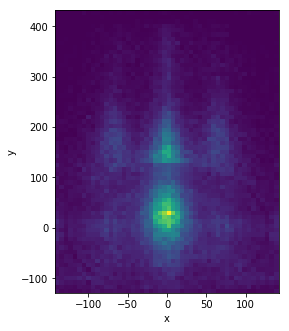

In [149]:
fig = plt.figure(figsize=(4,5.2))
plt.hist2d(pos_df["x"], pos_df["y"], bins=(50,65))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

This overall distribution of rocks makes a lot of sense.  
* We see a large concentration of rocks near the button (a little in front of it, which is a more desirable position than being being behind it, so it makes sense to be biased forward.)
* Similarly, we see increased density where a tight centre guard would be, the best position to defend the button stone, fading to lower densities as we move out from the house.
* We also see increased density in the house near the centre line on the outer side of the house, and guards to match.  This is the common strategy to score the most points possible if you have last rock.
* It looks like there are faint lines of lower density where the boundaries of each region of the house might be.  This probably stems from the statistics-taker never putting a rock EXACTLY on those boundaries (when positions are approximate, those guiding lines would probably bias the position chosen by the statistics taker so that they are not exactly on top of it.)

The stone_positions table therefore looks like it contains reasonable data, and even the aggregate position plot already demonstrates some of the principles of curling strategy.  With this plot we conclude the preliminary data exploration, having looked through all tables, verified that the data appears to make sense, and identified areas where there may be quirks that need to be worked around.